In [3]:
#pip install --upgrade google-cloud-bigquery

  Created wheel for proto-plus: filename=proto_plus-1.10.0-py3-none-any.whl size=37002 sha256=6e9c393325f83956a8fdb0b4cb5fc92a909d2165e93c1d96b95201bb2296f3eb
  Stored in directory: c:\users\conno\appdata\local\pip\cache\wheels\11\33\fc\104a428f03e59037ac73931b71b719ba559c37a3683ec39391
Successfully built proto-plus
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from google.cloud import bigquery

# Big Query Address: https://console.cloud.google.com/home/dashboard?project=home-credit-2-290621
# Left Menu > Scroll down to BigQuery
# The lines below are commented out so I don't accidentally run them again

#client = bigquery.Client.from_service_account_json(r"C:\Users\conno\Documents\School\Brazil\MAI_5003\Projetos\Home_Credit\Google_Big_Query\Chave\Home Credit 2-9d00812c3703.json")

#query = """ 
#SELECT 
#  *
#FROM
#  home-credit-2-290621.tabelas_manipuladas.modelling_database_1
#"""

#query_job = client.query(query)
#df = query_job.to_dataframe()


In [3]:
#df.to_csv(path_or_buf=r'C:\Users\conno\Documents\School\Brazil\MAI_5003\Projetos\Home_Credit\Python\EDA\modeling_table_1.csv', sep=',', header=True, index=True)

In [17]:
# Load the dataframe
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,delinquency_6_mths_working_capital_bureau,delinquency_6_12_mths_working_capital_bureau,delinquency_12_24_mths_working_capital_bureau,delinquency_24_36_mths_working_capital_bureau,delinquency_long_working_capital_bureau,delinquency_6_mths_microloan_bureau,delinquency_6_12_mths_microloan_bureau,delinquency_12_24_mths_microloan_bureau,delinquency_24_36_mths_microloan_bureau,delinquency_long_microloan_bureau
0,226605,0,Revolving loans,F,N,N,0,180000.0,270000.0,13500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,198289,0,Revolving loans,M,Y,Y,1,468000.0,765000.0,38250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,119805,0,Cash loans,M,Y,Y,1,427500.0,1042560.0,55674.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,104932,0,Cash loans,F,Y,Y,0,117000.0,657000.0,23728.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,383641,0,Cash loans,F,N,Y,0,157500.0,486265.5,32517.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


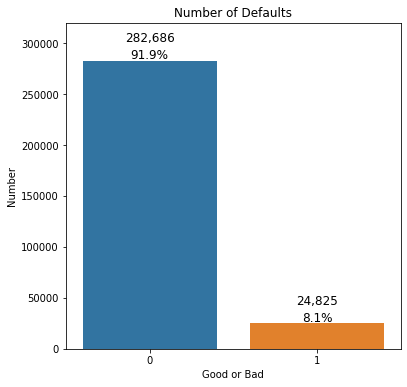

In [57]:
# Import matplotlib / seaborn / etc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Basic detail on the repayment of the loans
val = df['TARGET'].value_counts()
pct = (val.values / val.values.sum())

num_def_df = pd.DataFrame({'Good or Bad': val.index,
                   'Number': val.values
                  })
plt.figure(figsize = (6,6))
plt.title('Number of Defaults')
sns.set_color_codes("pastel")
sns.barplot(x = 'Good or Bad', y="Number", data=num_def_df)
locs, labels = plt.xticks()
plt.ylim(0, 320000)

 
for index,data in enumerate(val):
    plt.text(x=index , y =data+22500 , s=f"{data:,}".format() , fontdict=dict(fontsize=12), va='center', ha='center')
    
for index,data in enumerate(pct):
    plt.text(x=index , y =val[index] + 5500, s=f"{data:.1%}".format() , fontdict=dict(fontsize=12), va='center', ha='center')

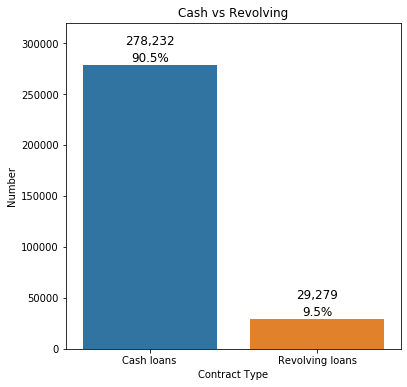

In [64]:
# Examine some variables and their relationship with the target variable
# Loan Type - Cash/Reolving
# Basic detail on the repayment of the loans
val = df['NAME_CONTRACT_TYPE'].value_counts()
pct = (val.values / val.values.sum())

plt_df = pd.DataFrame({'Contract Type': val.index,
                   'Number': val.values
                  })

plt.figure(figsize = (6,6))
plt.title('Cash vs Revolving')
sns.set_color_codes("pastel")
sns.barplot(x = 'Contract Type', y="Number", data=plt_df)
locs, labels = plt.xticks()
plt.ylim(0, max(val)*1.15)

 
for index,data in enumerate(val):
    plt.text(x=index , y =val[index] + max(val)*0.085, s=f"{data:,}".format() , fontdict=dict(fontsize=12), va='center', ha='center')
    
for index,data in enumerate(pct):
    plt.text(x=index , y =val[index] + max(val)*0.025, s=f"{data:.1%}".format() , fontdict=dict(fontsize=12), va='center', ha='center')

Text(0.05, 0.01, 'The black lines on the bars represent the Confidence Interval on a bootstrapped sample')

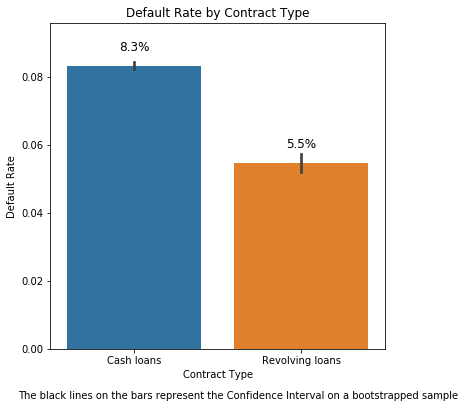

In [98]:
# The relationship between contract type & default rate
# Dataframe of the Contract Type and the associated default rate
gb_1 = df.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()

plt.figure(figsize = (6,6))
plot_ct = sns.barplot(x = 'NAME_CONTRACT_TYPE', y='TARGET', data=df, order=['Cash loans','Revolving loans'])

plot_ct.set(xlabel='Contract Type', ylabel='Default Rate', title='Default Rate by Contract Type')
plt.ylim(0, max(gb_1)*1.15)

for index,value in enumerate(gb_1):
    plt.text(x=index , y =value + max(gb_1)*0.065, s=f"{value:.1%}".format() , fontdict=dict(fontsize=12), va='center', ha='center')
    
ci_txt = 'The black lines on the bars are the Confidence Interval on a bootstrapped sample'
plt.figtext(0.05, 0.01, subtitle, ha="left", fontsize=10)

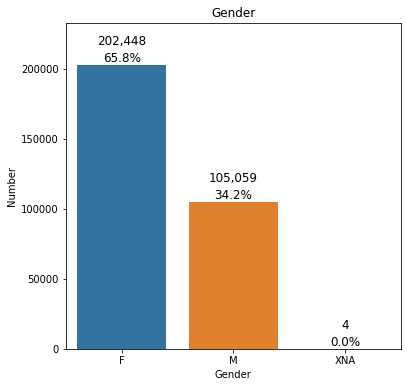

In [101]:
# Examine some variables and their relationship with the target variable
# Gender
val = df['CODE_GENDER'].value_counts()
pct = (val.values / val.values.sum())

plt_df = pd.DataFrame({'Gender': val.index,
                   'Number': val.values
                  })

plt.figure(figsize = (6,6))
plt.title('Gender')
sns.set_color_codes("pastel")
sns.barplot(x = 'Gender', y="Number", data=plt_df)
locs, labels = plt.xticks()
plt.ylim(0, max(val)*1.15)

 
for index,data in enumerate(val):
    plt.text(x=index , y =val[index] + max(val)*0.085, s=f"{data:,}".format() , fontdict=dict(fontsize=12), va='center', ha='center')
    
for index,data in enumerate(pct):
    plt.text(x=index , y =val[index] + max(val)*0.025, s=f"{data:.1%}".format() , fontdict=dict(fontsize=12), va='center', ha='center')

Text(0.05, 0.01, 'The black lines on the bars represent the Confidence Interval on a bootstrapped sample')

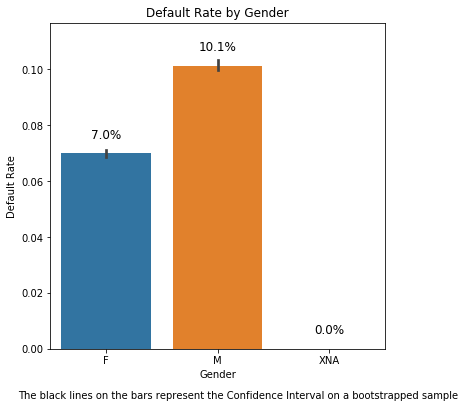

In [106]:
# The relationship between contract type & default rate
# Dataframe of the Contract Type and the associated default rate
gb_1 = df.groupby('CODE_GENDER')['TARGET'].mean()

plt.figure(figsize = (6,6))
plot_ct = sns.barplot(x = 'CODE_GENDER', y='TARGET', data=df, order=['F','M','XNA'])

plot_ct.set(xlabel='Gender', ylabel='Default Rate', title='Default Rate by Gender')
plt.ylim(0, max(gb_1)*1.15)

for index,value in enumerate(gb_1):
    plt.text(x=index , y =value + max(gb_1)*0.065, s=f"{value:.1%}".format() , fontdict=dict(fontsize=12), va='center', ha='center')
    
ci_txt = 'The black lines on the bars are the Confidence Interval on a bootstrapped sample'
plt.figtext(0.05, 0.01, subtitle, ha="left", fontsize=10)

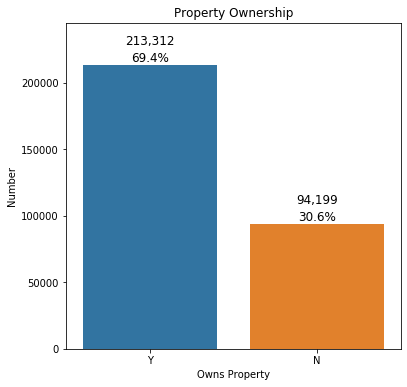

In [110]:
# Examine some variables and their relationship with the target variable
# Housing
val = df['FLAG_OWN_REALTY'].value_counts()
pct = (val.values / val.values.sum())

plt_df = pd.DataFrame({'Owns Property': val.index,
                   'Number': val.values
                  })

plt.figure(figsize = (6,6))
plt.title('Property Ownership')
sns.set_color_codes("pastel")
sns.barplot(x = 'Owns Property', y="Number", data=plt_df)
locs, labels = plt.xticks()
plt.ylim(0, max(val)*1.15)

 
for index,data in enumerate(val):
    plt.text(x=index , y =val[index] + max(val)*0.085, s=f"{data:,}".format() , fontdict=dict(fontsize=12), va='center', ha='center')
    
for index,data in enumerate(pct):
    plt.text(x=index , y =val[index] + max(val)*0.025, s=f"{data:.1%}".format() , fontdict=dict(fontsize=12), va='center', ha='center')

Text(0.05, 0.01, 'The black lines on the bars represent the Confidence Interval on a bootstrapped sample')

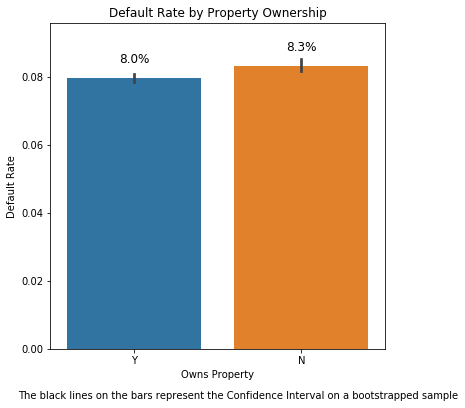

In [122]:
# The relationship between contract type & default rate
# Dataframe of the Contract Type and the associated default rate
gb_1 = df.groupby('FLAG_OWN_REALTY')['TARGET'].mean()

plt.figure(figsize = (6,6))
plot_ct = sns.barplot(x = 'FLAG_OWN_REALTY', y='TARGET', data=df, order=['Y','N'])

plot_ct.set(xlabel='Owns Property', ylabel='Default Rate', title='Default Rate by Property Ownership')
plt.ylim(0, max(gb_1)*1.15)

#for index,value in enumerate(gb_1):
plt.text(x=1 , y =gb_1[0] + max(gb_1)*0.065, s=f"{gb_1[0]:.1%}".format() , fontdict=dict(fontsize=12), va='center', ha='center')
plt.text(x=0 , y =gb_1[1] + max(gb_1)*0.065, s=f"{gb_1[1]:.1%}".format() , fontdict=dict(fontsize=12), va='center', ha='center')
    
ci_txt = 'The black lines on the bars are the Confidence Interval on a bootstrapped sample'
plt.figtext(0.05, 0.01, subtitle, ha="left", fontsize=10)